## Part-I (Dataset Exploration: Loan Data from Prosper)
### by (Meshari Althubaiti)

__________________

# Table of Contents:

* [Introduction](#Introduction)


* [Importing Data and Libraries](#Importing_Data_and_Libraries)


* [Preliminary Wrangling](#Preliminary_Wrangling)

    
* [Univariate Exploration](#Univariate_Exploration)

    - [Borrower Rate](#1)
    - [Loan Original Amount](#2)
    - [Total Prosper Loans](#3)
    - [Owning Home](#4)
    - [Loan Term](#5)
    - [Loan Status (no past due dates)](#6)
    - [Employment Status](#7)
    - [Employment Status Duration](#8)


* [Bivariate Exploration](#Bivariate_Exploration)

    - [Employment Status & Owning Home](#9)
    - [Loan Original Amount vs. Monthly Loan Payment](#10)
    - [Term & Borrower Rate](#11)
    - [Loan Status & Total Prosper Loans](#12)
    - [Owning Home & Loan Reason](#13)


* [Multivariate Exploration](#Multivariate_Exploration)

    - [Borrower Rate vs. Loan Original Amount & Employment Status Duration](#14)
    - [Loan Status vs. Employment Status & Loan Term](#15)


* [Conclusions](#Conclusions)


* [Reference List](#Reference_List)

______________________________

<a id='Introduction'></a>
# <font color="red">Introduction</font>

In Part I of this project (Communicate Data Findings), the dataset that will be explored is "Prosper Loan Data."
This data is about loans that were given by Prosper. The file includes information about loan amount, borrower rate (or interest rate), current loan status, borrower income, etc.

____________________________

<a id='Importing_Data_and_Libraries'></a>
# <font color="red">Importing Data and Libraries</font>

In [1]:
# import all packages and set plots to be embedded inline.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
%matplotlib inline
from ipywidgets import interactive

In [2]:
# Loading and reading the dataset: 
pld = pd.read_csv('prosperLoanData.csv')  # pld = prosper Loan Data

___________________

<a id='Preliminary_Wrangling'></a>
# <font color="red">Preliminary Wrangling</font>


* This dataset contains 81 columns (variables). Only those that are related to this analysis will be selected, as follows:

In [3]:
loans = pld[['ListingNumber', 'BorrowerRate','EmploymentStatus', 'EmploymentStatusDuration', 'StatedMonthlyIncome',
             'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'LoanOriginalAmount',
             'Term', 'MonthlyLoanPayment', 'TotalProsperLoans',
              'LoanStatus']]

* Features Description:

1- BorrowerRate: This loan's interest rate for the borrower. 

2- EmploymentStatus: The employment status of the borrower at the time they posted the listing.

3- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide        documentation confirming they are a homeowner.

4- EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.

5- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

6- LoanStatus: The current status of the loan: `Cancelled`,  `Chargedoff`, `Completed`, `Current`, `Defaulted`, `FinalPaymentInProgress`, `PastDue`. The PastDue status will be accompanied by a delinquency bucket.

7- TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the    borrower had no prior loans. 

8- TotalProsperPaymentsBilled: Number of on time payments the borrower made on Prosper loans at the time they created this        listing. This value will be null if the borrower had no prior loans.

9- Term: The length of the loan expressed in months.

10- ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: `0` - Not Available, `1` - Debt Consolidation, `2` - Home Improvement, `3` - Business, `4` - Personal Loan, `5` - Student Use, `6` - Auto, `7`- Other, `8` - Baby&Adoption, `9` - Boat, `10` - Cosmetic Procedure, `11` - Engagement Ring, `12` - Green Loans, `13` - Household Expenses, `14` - Large Purchases, `15` - Medical/Dental, `16` - Motorcycle, `17` - RV, `18` - Taxes, `19` - Vacation, `20` - Wedding Loans

11- Occupation: The Occupation selected by the Borrower at the time they created the listing.

12- LoanOriginalAmount: The origination amount of the loan.

13- MonthlyLoanPayment: The scheduled monthly loan payment.

> The sub-dataframe (loans) will need to be cleaned and organised first in order to visualise the data properly.

* Visual assessment:

In [4]:
loans.head(60)

,ListingNumber,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IsBorrowerHomeowner,ListingCategory (numeric),LoanOriginalAmount,Term,MonthlyLoanPayment,TotalProsperLoans,LoanStatus
0,193129,0.1580,Self-employed,2.0,3083.333333,True,0,9425,36,330.43,NaN,Completed
1,1209647,0.0920,Employed,44.0,6125.000000,False,2,10000,36,318.93,NaN,Current
2,81716,0.2750,Not available,NaN,2083.333333,False,0,3001,36,123.32,NaN,Completed
3,658116,0.0974,Employed,113.0,2875.000000,True,16,10000,36,321.45,NaN,Current
4,909464,0.2085,Employed,44.0,9583.333333,True,2,15000,36,563.97,1.0,Current
5,1074836,0.1314,Employed,82.0,8333.333333,True,1,15000,60,342.37,NaN,Current
6,750899,0.2712,Employed,172.0,2083.333333,False,1,3000,36,122.67,NaN,Current
7,768193,0.2019,Employed,103.0,3355.750000,False,2,10000,36,372.60,NaN,Current
8,1023355,0.0629,Employed,269.0,3333.333333,True,7,10000,36,305.54,NaN,Current
9,1023355,0.0629,Employed,269.0,3333.333333,True,7,10000,36,305.54,NaN,Current


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   BorrowerRate               113937 non-null  float64
 2   EmploymentStatus           111682 non-null  object 
 3   EmploymentStatusDuration   106312 non-null  float64
 4   StatedMonthlyIncome        113937 non-null  float64
 5   IsBorrowerHomeowner        113937 non-null  bool   
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   LoanOriginalAmount         113937 non-null  int64  
 8   Term                       113937 non-null  int64  
 9   MonthlyLoanPayment         113937 non-null  float64
 10  TotalProsperLoans          22085 non-null   float64
 11  LoanStatus                 113937 non-null  object 
dtypes: bool(1), float64(5), int64(4), object(2)
memory usage: 9.7+ MB


In [6]:
loans.describe()

,ListingNumber,BorrowerRate,EmploymentStatusDuration,StatedMonthlyIncome,ListingCategory (numeric),LoanOriginalAmount,Term,MonthlyLoanPayment,TotalProsperLoans
count,1.139370e+05,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,22085.000000
mean,6.278857e+05,0.192764,96.071582,5.608026e+03,2.774209,8337.01385,40.830248,272.475783,1.421100
std,3.280762e+05,0.074818,94.480605,7.478497e+03,3.996797,6245.80058,10.436212,192.697812,0.764042
min,4.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,12.000000,0.000000,0.000000
25%,4.009190e+05,0.134000,26.000000,3.200333e+03,1.000000,4000.00000,36.000000,131.620000,1.000000
50%,6.005540e+05,0.184000,67.000000,4.666667e+03,1.000000,6500.00000,36.000000,217.740000,1.000000
75%,8.926340e+05,0.250000,137.000000,6.825000e+03,3.000000,12000.00000,36.000000,371.580000,2.000000
max,1.255725e+06,0.497500,755.000000,1.750003e+06,20.000000,35000.00000,60.000000,2251.510000,8.000000


In [7]:
#There is a duration of 500 months of employment.
loans.loc[loans['EmploymentStatusDuration'] > 500]

,ListingNumber,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IsBorrowerHomeowner,ListingCategory (numeric),LoanOriginalAmount,Term,MonthlyLoanPayment,TotalProsperLoans,LoanStatus
38,869272,0.0759,Other,539.0,6000.000000,True,1,7000,36,218.03,NaN,Current
137,1103750,0.1795,Employed,551.0,1416.666667,False,1,4000,36,144.51,NaN,Current
233,684354,0.2346,Other,534.0,2166.666667,False,2,3500,36,136.32,1.0,Current
787,718841,0.2579,Employed,517.0,4166.666667,False,14,10000,60,298.16,NaN,Current
908,1189646,0.0990,Employed,547.0,7833.333333,True,1,15000,36,483.30,NaN,Current
...,...,...,...,...,...,...,...,...,...,...,...,...
111663,1147927,0.1239,Other,510.0,6777.166667,True,1,6000,36,200.41,NaN,Current
112060,538938,0.3149,Other,515.0,2492.500000,False,7,4000,36,173.09,NaN,Chargedoff
112246,591224,0.2610,Employed,523.0,4166.666667,True,1,7000,60,210.00,1.0,Completed
113292,896993,0.2769,Other,551.0,2666.666667,False,1,9000,36,370.77,NaN,Current


* ### Assessment:

1- There are no spaces in the column names, which reduces readability.

2- `Employment_Status_Duration` has durations that are larger than 500, which is a long time for a person to work during their lifetime before retirement. Also, the `Borrower's_Occupation` and `Employment_Status` are entered as "other," which may cause outlying data.

3- Convert `Employment_Status_Duration` from months to years for more convenient visualizations.

4- The ListingCategory (numeric) column should be filled with the category names, not the numbers.

* ### Cleaning: 

### Issue #1

##### Define: 
Column names may not be as descriptive to the reader as they should be. Replace the column names so that they are more readable.

##### Code:

In [8]:
loans = loans.rename(columns={ 'ListingNumber': 'Listing_Number', 'BorrowerRate': 'Borrower_Rate' , 
                              'EmploymentStatus': 'Employment_Status',
                               'IsBorrowerHomeowner':'Owning_home', 'EmploymentStatusDuration':'Employment_Status_Duration',
                               'StatedMonthlyIncome':'Stated_Monthly_Income', 'LoanStatus':'Loan_Status',
                               'TotalProsperLoans':'Total_Prosper_Loans', 'ListingCategory (numeric)':'Loan_Reason',
                               'LoanOriginalAmount':'Loan_Original_Amount', 'MonthlyLoanPayment':'Monthly_Loan_Payment'})
    
   

##### Test:

In [9]:
for col in loans.columns:
    print(col)

Listing_Number
Borrower_Rate
Employment_Status
Employment_Status_Duration
Stated_Monthly_Income
Owning_home
Loan_Reason
Loan_Original_Amount
Term
Monthly_Loan_Payment
Total_Prosper_Loans
Loan_Status


### Issue #2

##### Define: 
`Employment_Status_Duration` has durations that are larger than 500, which is a long time for a typical person to work during their lifetime before retirement. Also, the borrower's occupation and employment status are entered as other, which may cause outlying data. Remove these rows by using the drop function.

##### Code:

In [10]:
over_500 = loans[loans['Employment_Status_Duration'] > 500].index
loans.drop(over_500 , inplace=True)

##### Test:

In [11]:
loans.loc[loans['Employment_Status_Duration'] > 500]

,Listing_Number,Borrower_Rate,Employment_Status,Employment_Status_Duration,Stated_Monthly_Income,Owning_home,Loan_Reason,Loan_Original_Amount,Term,Monthly_Loan_Payment,Total_Prosper_Loans,Loan_Status


### Issue #3

##### Define: 
Convert `Employment Status Duration` from months to years for more convenient visualizations.

##### Code: 

In [12]:
# Dividing by 12 months to convert the durations from months to years.
loans['Employment_Status_Duration'] = loans['Employment_Status_Duration']/12

##### Test: 

In [13]:
loans['Employment_Status_Duration']

0          0.166667
1          3.666667
2               NaN
3          9.416667
4          3.666667
            ...    
113932    20.500000
113933     1.750000
113934     7.000000
113935     7.833333
113936    20.333333
Name: Employment_Status_Duration, Length: 113707, dtype: float64

### Issue #4 

##### Define: 
The Listing Category (numeric) column should be filled with the category names, not the numbers. Refill the column with the categories instead of integer numbers.

##### Code: 

In [14]:
loans = loans.replace({'Loan_Reason' : 
                       
                       {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement',
                        3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',
                        7: 'Other', 8: 'Baby & Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
                        11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 
                        14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
                        17: 'RV',  18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
                       
                        })

##### Test:

In [15]:
loans.Loan_Reason.value_counts()

Debt Consolidation    58168
Not Available         16961
Other                 10471
Home Improvement       7417
Business               7176
Auto                   2566
Personal Loan          2395
Household Expenses     1986
Medical/Dental         1515
Taxes                   885
Large Purchases         872
Wedding Loans           769
Vacation                763
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: Loan_Reason, dtype: int64

### Q: What is the structure of your dataset?

In [16]:
print(loans.shape)

(113707, 12)


> The main dataset contains 113,937 rows (loans) and 81 columns (features). However, not all 81 columns will be analyzed. The sub-dataset will contain 12 that are necessary for this analysis.

### Q:  What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out which features are best for predicting the loan-borrower rate.

### Q: What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some features, such as monthly income, occupation, listing category, and other significant features, I anticipate will contribute to my investigation to learn more about borrower rates. Also, I will discover the most important features that can help analyse and understand this dataset.

________________________________

<a id='Univariate_Exploration'></a>
# <font color="red">Univariate Exploration</font>




## <font color="blue">Visualization #1</font>


<a id='1'></a>
**Borrower Rate**

* First, I will look at the distribution of the main variable of interest: **Borrow Rate**

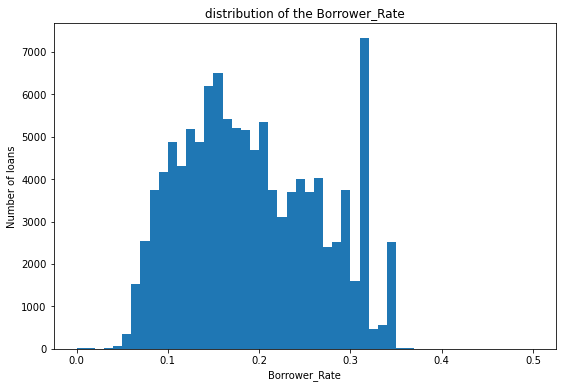

In [17]:
binsize = 0.01
bins = np.arange(0, loans['Borrower_Rate'].max()+binsize, binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = loans, x = 'Borrower_Rate', bins = bins)

#set up axis settings
plt.xlabel('Borrower_Rate')
plt.ylabel('Number of loans')
plt.title('distribution of the Borrower_Rate')
plt.show()

Borrower rate distributions have a normal distribution shape. Also, the distribution appears to be a bit skewed to the right.
However, there's a long tail in the distribution at about 0.32. The following cell will show additional investigation to fully comprehend all information about this peak at approximately 0.32. 

In [18]:
loans.loc[(loans['Borrower_Rate']>0.3) & (loans['Borrower_Rate']<0.35)]

,Listing_Number,Borrower_Rate,Employment_Status,Employment_Status_Duration,Stated_Monthly_Income,Owning_home,Loan_Reason,Loan_Original_Amount,Term,Monthly_Loan_Payment,Total_Prosper_Loans,Loan_Status
15,577164,0.3177,Other,10.083333,5500.000000,True,Household Expenses,4000,36,173.71,NaN,Defaulted
22,706927,0.3134,Other,5.666667,118.333333,False,Debt Consolidation,4000,36,172.76,NaN,Current
31,643927,0.3177,Other,3.666667,2250.000000,False,Home Improvement,2000,36,86.85,NaN,Current
71,658787,0.3177,Employed,11.750000,2916.666667,True,Household Expenses,2774,36,120.47,NaN,Current
74,496566,0.3199,Employed,17.750000,5314.250000,True,Other,2500,36,108.87,NaN,Chargedoff
...,...,...,...,...,...,...,...,...,...,...,...,...
113875,539458,0.3149,Employed,8.083333,4702.166667,True,Other,5000,36,216.36,NaN,Past Due (61-90 days)
113905,539189,0.3177,Employed,14.583333,3250.000000,True,Debt Consolidation,4000,36,173.71,NaN,Chargedoff
113907,1005215,0.3134,Employed,7.166667,2166.666667,False,Debt Consolidation,4000,36,172.76,NaN,Current
113908,486057,0.3220,Employed,5.666667,2833.333333,False,Business,7500,36,327.49,NaN,Completed


## <font color="blue">visualization #2</font>

<a id='2'></a>
**Loan Original Amount**

* Now, I will see the distribution of one of the factors that can affect the borrower rate: **Loan Original Amount**

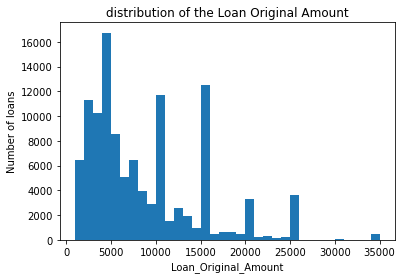

In [19]:
bin_size = 1000
bins = np.arange(1000, loans['Loan_Original_Amount'].max()+bin_size, bin_size)

plt.hist(data = loans, x = 'Loan_Original_Amount', bins = bins)

plt.xlabel('Loan_Original_Amount')
plt.ylabel('Number of loans')
plt.title('distribution of the Loan Original Amount')
plt.show()

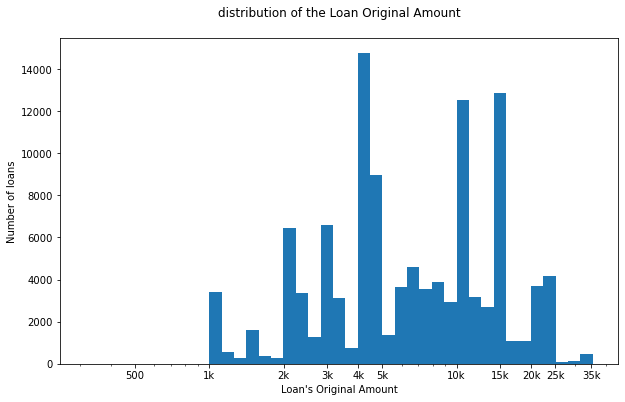

In [20]:
# The chart does not give much information about the loans. Amounts greater than $25,000 are difficult to see on the chart.
#Using axis scaling and "x ticks" will help see more information about the original amount of the loans.
plt.figure(figsize=[10, 6])

bins = 10 ** np.arange(2.5, np.log10(loans['Loan_Original_Amount'].max())+0.05, 0.05)

plt.hist(data = loans, x = 'Loan_Original_Amount', bins = bins)

plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3.5e4], [500, '1k', '2k', '3k', '4k', '5k', '10k',
                                                                       '15k', '20k', '25k', '35k'])
plt.xlabel("Loan's Original Amount")
plt.ylabel('Number of loans')
plt.title('distribution of the Loan Original Amount\n')

plt.show() 


As can be seen on the above histogram, the majority of the loans are between 4,000 and 4,504. There are also numerous loans ranging from 10,000 to 12,000 and 15,000 in amount. Furthermore, no loans are less than "1,000" and no loans are greater than "35,000," as shown in the chart above. To verify these observations, the following cell will illustrate the minimum and maximum amounts of the loans:

In [21]:
loans.Loan_Original_Amount.describe()

count    113707.000000
mean       8335.732787
std        6245.849408
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: Loan_Original_Amount, dtype: float64

## <font color="blue">Visualization #3</font>

<a id='3'></a> 
**Total Prosper Loans** 

* Next, I'll investigate other factors that could affect the borrower rate and present some interesting facts about them. 

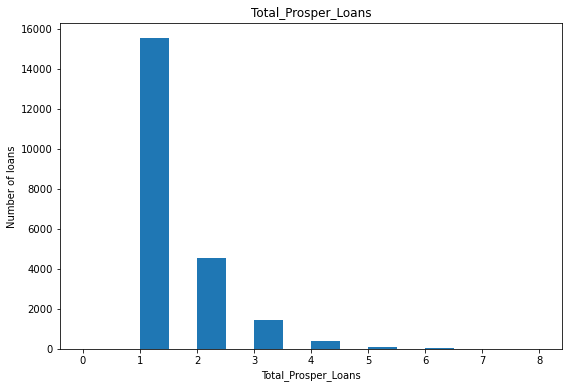

In [22]:
plt.figure(figsize=[9, 6])

binsize = 0.5
bins = np.arange(0, loans['Total_Prosper_Loans'].max()+binsize, binsize)

plt.hist(data = loans, x = 'Total_Prosper_Loans', bins = bins)


plt.xlabel('Total_Prosper_Loans')
plt.ylabel('Number of loans')
plt.title('Total_Prosper_Loans')
plt.show()

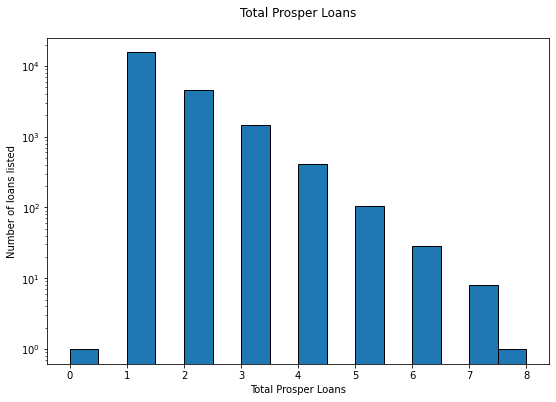

In [23]:
# There are values that are not displayed on the graph due to the absolute y-axis. 
#Using scaling and axis ticks, we will be able to transform and zoom out the above chart.

binsize = 0.5
bins = np.arange(0, loans['Total_Prosper_Loans'].max()+binsize, binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = loans, x = 'Total_Prosper_Loans', bins = bins, log =True, edgecolor = 'black')

plt.xlabel('Total Prosper Loans')
plt.ylabel('Number of loans listed')
plt.title('Total Prosper Loans\n');

The majority of those on the loan list (those who applied) had only one loan. Surprisingly, as the number of people applying for loans decreases, so does the number of loans. Furthermore, there is only one listing with eight loans, as shown below:

In [24]:
loans.Total_Prosper_Loans.value_counts()

1.0    15519
2.0     4534
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: Total_Prosper_Loans, dtype: int64

## <font color="blue">Visualization #4</font>

<a id='4'></a> 
**Owning Home**

* Now I'll look into the percentage of the **Owning Home:** 

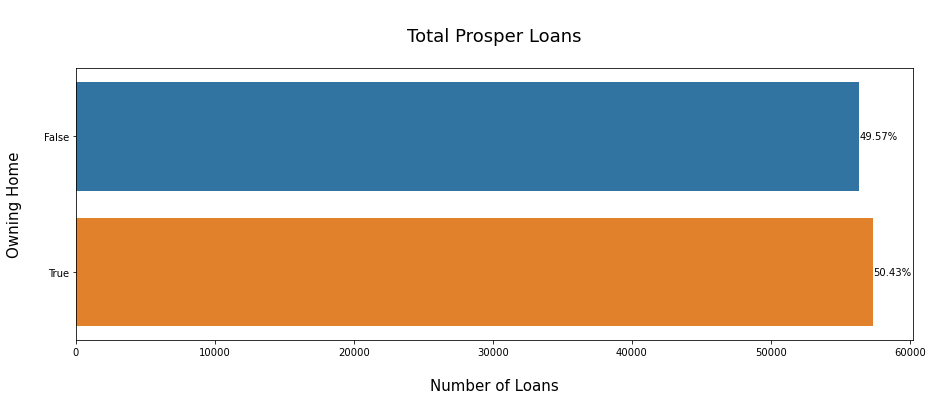

In [25]:
rcParams['figure.figsize'] = 15,5 #seitting the size of the fugire.

sb.countplot(data=loans, y ='Owning_home').set(title='Percentage of Owning home')

counts = loans['Owning_home'].value_counts()
counts_sum = loans['Owning_home'].value_counts().sum()

# Set up the loop for looping over the number of True and False in Owning Home
for i in range (counts.shape[0]):
    count = counts[i]
    count_to_str = '{:0.2f}%'.format(100*count/counts_sum) # converting count to string (text) 
    plt.text(count+1, i, count_to_str, va='center')
    
# Axis set up
plt.xlabel('\nNumber of Loans\n', size = 15)
plt.ylabel('Owning Home\n', size = 15)
plt.title('\nTotal Prosper Loans\n', size = 18);

As shown on the plot above, individuals who won homes are approximately equal to those who don't own homes. The difference is interesting; that is, there is only about a 0.86% difference. This difference is illustrated in the cell below.

In [26]:
print (loans.Owning_home.value_counts())
print(len(loans['Owning_home']))
T = (57346/113707)*100
F = (56361/113707)*100
result = round(T-F, 2)

print('\n \n The difference in percentage between people who own homes and those who do not is approximately', result,'%','.')


True     57346
False    56361
Name: Owning_home, dtype: int64
113707

 
 The difference in percentage between people who own homes and those who do not is approximately 0.87 % .


## <font color="blue">Visualization #5</font>

<a id='5'></a> 
**Loan Term**

* Next, I will see what is the most frequent loan term using the variable: Term **Term**:

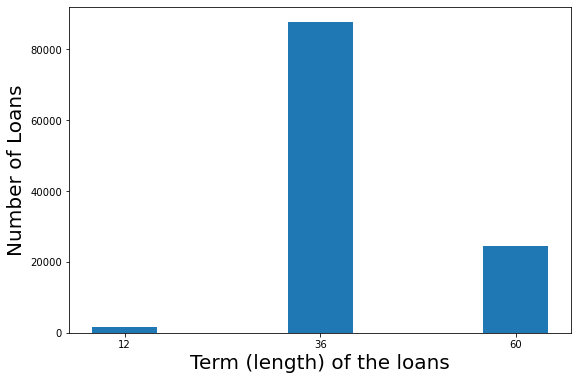

In [27]:
# set the data to be plotted
x = loans['Term'].unique()
y = loans['Term'].value_counts(sort=False)

# set the basic plot
plt.figure(figsize=[9, 6])
plt.bar(x, y, width = 8)

# Customize x-axis
x_ticks = [12 ,36, 60]
x_labels = ['12', '36','60']
plt.xticks(ticks=x_ticks, labels=x_labels)

# Labeling the axes
plt.xlabel('Term (length) of the loans', size = 20)
plt.ylabel('Number of Loans', size = 20)

# Display the plot
plt.show()

The plot is basic and does not accurately show how many loans each term has. So, some transformation would be helpful.
to understand the data better.

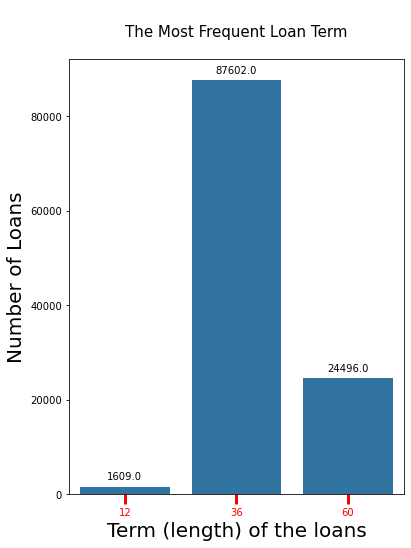

In [28]:
# set the data to be plotted
x = loans['Term'].unique()
y = loans['Term'].value_counts(sort=False)

# set the basic plot
plt.figure(figsize=(6, 8))
blue_color = sb.color_palette()[0]
barplot = sb.barplot(data = loans, x = x , y = y, ci = None, color= blue_color)


# Add annotations to the plot using a for loop.
for p in barplot.patches:
    barplot.annotate(format(p.get_height(),'.1f'), (p.get_x() + p.get_width() / 2.,
                                   p.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')

    
# Labeling the axes
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3, size = 10)
plt.xlabel('Term (length) of the loans', size = 20)
plt.ylabel('Number of Loans', size = 20)
plt.title('\nThe Most Frequent Loan Term\n', size = 15)

# Dsiplay the plot
plt.show()


In [29]:
term_12 = loans[loans['Term'] == 12]
term_36 = loans[loans['Term'] == 36]
term_60 = loans[loans['Term'] == 60]

result_12 = term_12['Term'].value_counts().sum()
result_36 = term_36['Term'].value_counts().sum()
result_60 = term_60['Term'].value_counts().sum()

print('As it can be seen on the bar graph above, most loans have a term of 36 months.')
print('However, the second-highest number of loans have a 60-month term.')
print('Finally, the lowest number of loans have only a 12-month term. \n')
print('The following counts illustrate how many loans there are for each loan term. \nThis conforms to what has been demonstrated on the bar plot. \n')

print('12-month term:', result_12)
print('36-month term:', result_36)
print('60-month term:', result_60)

As it can be seen on the bar graph above, most loans have a term of 36 months.
However, the second-highest number of loans have a 60-month term.
Finally, the lowest number of loans have only a 12-month term. 

The following counts illustrate how many loans there are for each loan term. 
This conforms to what has been demonstrated on the bar plot. 

12-month term: 1609
36-month term: 87602
60-month term: 24496


## <font color="blue">Visualization #6</font>

<a id='6'></a> 
**Loan Status (no past-due dates)**

* Next, I will investigate the number of loan statuses without the past-due statuses in the dataset using a Seaborn countplot.

In [30]:
# I will make a new dataframe that only contains the six loan statuses (without the past-due).

# Create a pandas series
ls = loans['Loan_Status'] # ls = loans statuses


# Creating conditions
conditions = (ls.str.contains('Current') | ls.str.contains('Completed') |
            ls.str.contains('Chargedoff') |ls.str.contains('Defaulted') |
            ls.str.contains('FinalPaymentInProgress') |
            ls.str.contains('Cancelled'))
 

# Use boolean indexing to extract values from the series that meet the conditions.
new_statuses = pd.DataFrame(ls[conditions])

new_statuses = new_statuses.replace({'Loan_Status' : {'FinalPaymentInProgress':'FPIP'}}) # FPIP = FinalPaymentInProgress
new_statuses


,Loan_Status
0,Completed
1,Current
2,Completed
3,Current
4,Current
...,...
113932,Current
113933,FPIP
113934,Current
113935,Completed


In [31]:
print(loans.Loan_Status.value_counts())

Current                   56406
Completed                 38041
Chargedoff                11974
Defaulted                  5016
Past Due (1-15 days)        803
Past Due (31-60 days)       361
Past Due (61-90 days)       312
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         15
Cancelled                     5
Name: Loan_Status, dtype: int64


In [32]:
print(' - The number of Current loans is: 56406.')
print(' - The number of Completed loans is: 38041.')
print(' - The number of Chargedoff loans is: 11974.')
print(' - The number of Defaulted loans is: 5016.')
print(' - The number of FPIP loans is: 205.')
print(' - The number of Cancelled loans is: 5.')
print(' - The total is: 111647\n')
print(' - The length of new_statues dataframe is:', len(new_statuses))

 - The number of Current loans is: 56406.
 - The number of Completed loans is: 38041.
 - The number of Chargedoff loans is: 11974.
 - The number of Defaulted loans is: 5016.
 - The number of FPIP loans is: 205.
 - The number of Cancelled loans is: 5.
 - The total is: 111647

 - The length of new_statues dataframe is: 111647


In [33]:
# To confirm that the total number of rows in the new statue frame is correct, the result of the following should be zero:
print((56406 + 38041 + 11974 + 5016 + 205 + 5 ) - len(new_statuses)) 

0


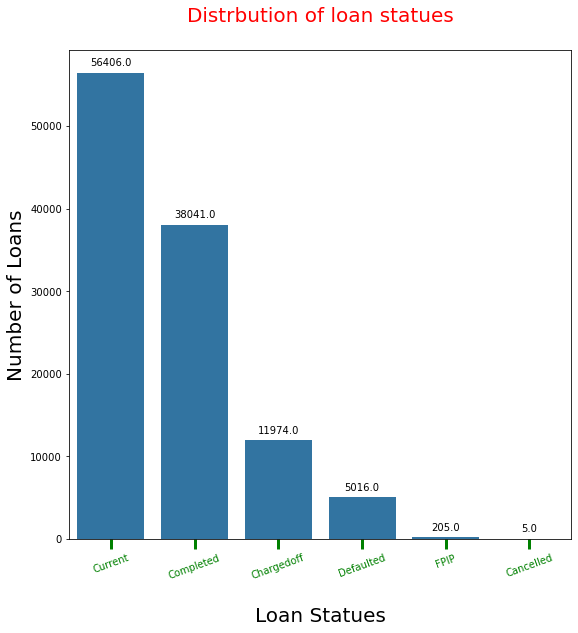

In [34]:
# set up the figure and colour
plt.figure(figsize=[9, 9])
blue_color = sb.color_palette()[0]

# set up the data for plot
freq = new_statuses['Loan_Status'].value_counts()
loans_order = freq.index

#plotting the data
countplot = sb.countplot(data=new_statuses, x='Loan_Status', color = blue_color, order = loans_order)

# Add annotations to the plot using a for loop.
for p in countplot.patches:
    countplot.annotate(format(p.get_height(),'.1f'), (p.get_x() + p.get_width() / 2.,
                                   p.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')

# Labeling the axis
plt.tick_params(axis='x', colors='green', direction='out', length=13, width=3, size = 10)
plt.xlabel('\nLoan Statues', size = 20)
plt.xticks(rotation=20)
plt.ylabel('Number of Loans', size = 20)
plt.title('Distrbution of loan statues\n', color= 'red', size = 20)

# Dsiplay the plot
plt.show();

Keeping in mind that the data frame does not include past-due, the new_statuses dataframe has only six loan statuses.
Current loans form the majority of the loans, accounting for 56406 loans. The second-highest Statue loans number is completed (38041 loans). Interestingly, cancelled loans are only 5, which is the lowest number of loans in the dataframe.

## <font color="blue">Visualization #7</font>

<a id='7'></a> 
**Employment Status**

* Next, I will explore the distribution of  **Employment Status:**

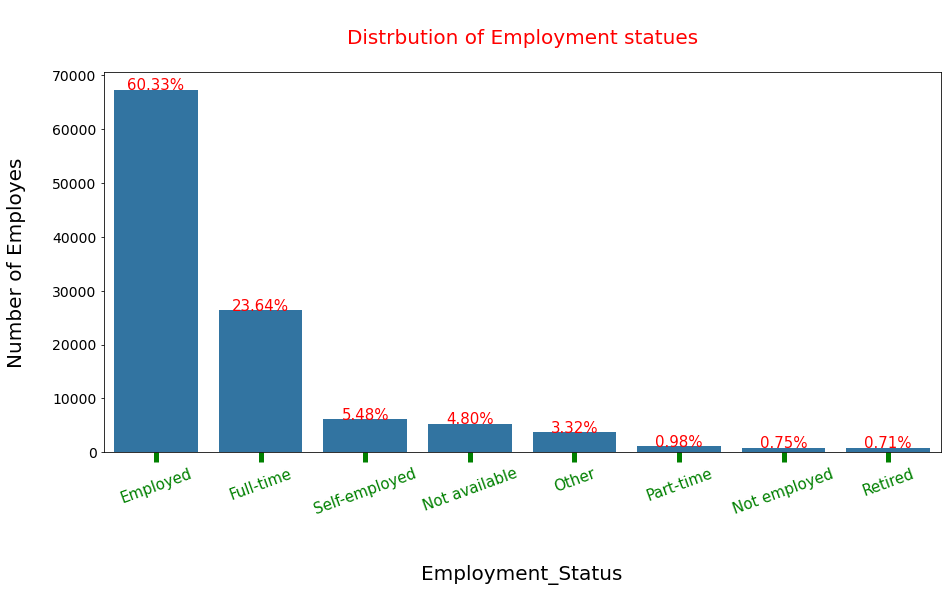

In [35]:
# Set up the color and figure size:
plt.figure(figsize=[15, 7])
base_color = sb.color_palette()[0]

#set up data: 
ems_order = loans['Employment_Status'].value_counts().index # ems = Employment_Status
ems_counts = loans['Employment_Status'].value_counts()
sum_ems = loans['Employment_Status'].value_counts().sum() # sum of all not null values

# plot the data: 
sb.countplot(data = loans, x = 'Employment_Status', color = base_color, order = ems_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=29, size = 15) 

# loop for the annotation on the plot
for loc, label in zip(locs, labels):
    
    count = ems_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/sum_ems)

    # printing the annotation
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'red', size = 15)
    
    
# Labeling the x-axis
plt.tick_params(axis = 'x', colors = 'green', direction='out', length=13, width = 5, size = 10)
plt.xlabel('\n\nEmployment_Status', size = 20)
plt.xticks(rotation=20)

# Labeling the y-axis
plt.ylabel('Number of Employes\n', size = 20)
plt.yticks(size = 14)

plt.title('\nDistrbution of Employment statues\n', color= 'red', size = 20)

# Dsiplay the plot
plt.show();

After visualising the data on employment status, it appears that more than half of the applicants to the loans are employed (60.33%). Also, it can be seen that people with full-time jobs make up 23.64% of applicants. Finally, individuals working part-time, not employed, and retired form only about 3%.

In [36]:
# Create the Percentage
percs = loans.Employment_Status.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
ems_counts = loans['Employment_Status'].value_counts()

#concatenate results into one DataFrame
pd.concat([ems_counts,percs], axis=1, keys=['Number of employes', 'Percentage'])

,Number of employes,Percentage
Employed,67244,60.33%
Full-time,26343,23.64%
Self-employed,6107,5.48%
Not available,5347,4.8%
Other,3695,3.32%
Part-time,1087,0.98%
Not employed,835,0.75%
Retired,794,0.71%


## <font color="blue">Visualization #8</font>

<a id='8'></a> 
**Employment Status Duration**

* Following an examination of the distribution of employment status, I will investigate how long the majority of applicants were in their employment status. To put it another way, I plan to look into the distribution of employment status duration. 

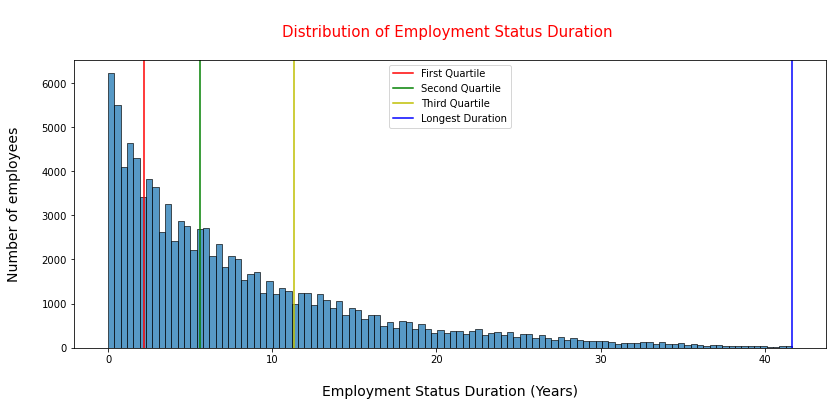


 First Quartile = 2.17
 Second Quartile = 5.58
 Third Quartile =  11.33
 Longest Duration = 41.67


In [37]:
# Set up the figure size and position: 
plt.figure(figsize=[19, 10])
plt.subplots_adjust(left=0.15, bottom=0.3, right=0.70, top=0.7, wspace=0.2, hspace=0.2)

# plotting Employment Status Duration
sb.histplot(x = 'Employment_Status_Duration', data = loans)

# create the quartiles for durations in years.
q1, q2, q3 = loans.Employment_Status_Duration.quantile([0.25, 0.5, 0.75])
maxx = loans.Employment_Status_Duration.max()

# create thequartaile lines
plt.axvline(q1, color = 'r', label = 'First Quartile')
plt.axvline(q2, color = 'g', label = 'Second Quartile')
plt.axvline(q3, color = 'y', label = 'Third Quartile')
plt.axvline(maxx, color = 'b', label = 'Longest Duration')

# Customizing titles, labels, and legend
plt.title('\nDistribution of Employment Status Duration \n', color = 'red', size= 15)
plt.xlabel('\nEmployment Status Duration (Years)', size = 14)
plt.ylabel('Number of employees\n', size = 14)
plt.legend()
plt.show();

print('\n First Quartile =', round(q1,2))
print(' Second Quartile =', round(q2, 2))
print(' Third Quartile = ', round(q3, 2))
print(' Longest Duration =', round(maxx,2))

The majority of the employees had been in their job positions for about a year to 11.33 years. However, only a few thousand applicants exceed 12 years in the same position.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of `Borrower Rate` follows a normal distribution. Additionally, the distribution is somewhat skewed to the right. However, the distribution has a long peak around roughly 0.32.

Also, I used a log transform to examine the data because the `Loan Original Amount` variable had a wide range of values. The transformed data resembled multiple peaks of distribution between 4000 and 15000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the features that I have investigated up to now did not display any unusual distributions. However, `Total Prosper Loans` did not display correctly. I had to transform the axis in order to see the distribution of all loan totals.

___________________________

<a id='Bivariate_Exploration'></a>
# <font color="red">Bivariate Exploration</font>



In this section, I will consider and visualise multiple pairs of variables and try to see how these pairs would affect in any way the decision by Prosper Bank to lend a loan to the applicant.

## <font color="blue">Visualization #9</font>

<a id='9'></a> 
**Employment Status & Owning Home**

* For this part, I will explore different employment statuses and ownership of a home. For example, we could determine whether or not the two varieties are related. 

First, all three categories (full-time, part-time, and employed) should be combined because they are all likely to be considered employees regardless of the type of job. So, I will convert all the different job types into only one general type, "employed." Also, there are some cases where there are values of "other" and "not available." These should be in one category, "Not available." That is, we do not know what is meant by "other," so we do not have much information available about it.

In [38]:
# convert job types to "Employed" and "Othere" to "Not available."
loans = loans.replace({'Employment_Status' : {'Full-time': 'Employed', 'Part-time': 'Employed', 'Other':'Not available'}})

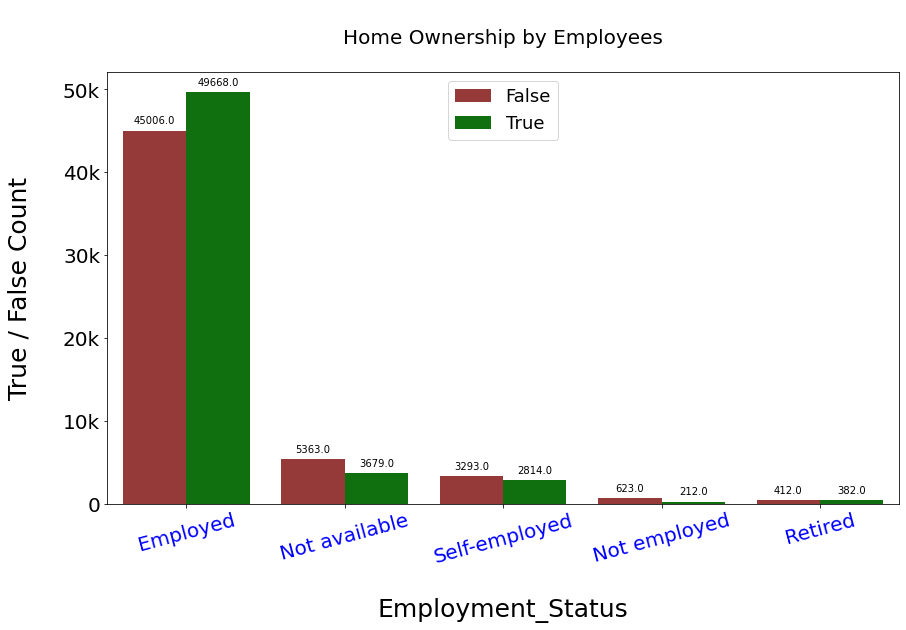

In [39]:
# Set up the figure size and position.
plt.figure(figsize=[20, 15])
plt.subplots_adjust(left=0.10, bottom=0.3, right=0.65, top=0.7, wspace=0.2, hspace=0.2)

# Set up home data to make it in decreasing order
em_counts = loans['Employment_Status'].value_counts() # em = employment
em_index = em_counts.index

#plotting the data
home_countplot = sb.countplot(data = loans, x = 'Employment_Status', hue = 'Owning_home', order = em_index,
                              palette=['brown', 'green'])
                             

# Add annotations to the plot using a for loop.
for home in home_countplot.patches:
    home_countplot.annotate(format(home.get_height(),'.1f'), (home.get_x() + home.get_width() / 2,
                                   home.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')
    
# x-axis settings
plt.xlabel('\nEmployment_Status', size = 25)
plt.xticks(rotation=15, size = 20, color = 'b')

# y-axis settings
plt.ylabel('True / False Count\n', size = 25)
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4], [0, '10k', '20k', '30k', '40k', '50k'], size = 20)

# Adding legend
plt.legend(fontsize = 18, loc='upper center')

# set up the title
plt.title('\nHome Ownership by Employees\n', size = 20)

# Dsiplay the plot
plt.show();

I found that, as it can be clearly seen on the above bar chart, employees have a higher percentage of owning a home. All the other categories seem to indicate they do not own a home, most likely because they do not have fixed jobs. However, this might make Prosper think twice before they approve loans to control the risk of making the wrong decision.

## <font color="blue">Visualization #10</font>

<a id='10'></a> 
**Loan Original Amount vs. Monthly Loan Payment**

* Next, I will see if there are relationships between the two variables (Loan Original Amount vs. Monthly Loan Payment). Also, I will examine if the relationship is positive or negative.

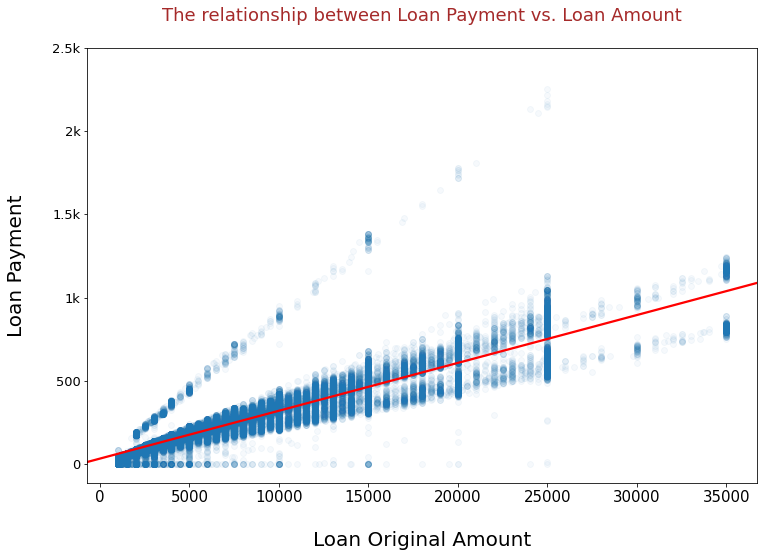

In [40]:
#Set up the figure size 
plt.figure(figsize=[12, 8])

# plot data
sb.regplot(data = loans, x = 'Loan_Original_Amount', y = 'Monthly_Loan_Payment', truncate=False, x_jitter=0.5,
                                                        scatter_kws={'alpha':1/25}, line_kws={"color": "red"});

# x-axis settings
plt.xlabel('\nLoan Original Amount', size = 20)
plt.xticks(size = 15)

# y-axis settings
plt.ylabel('Loan Payment\n', size = 20)
plt.yticks(size = 15)
plt.yticks([0, 500, 1e3, 1.5e3, 2e3, 2.5e3], [0, 500, '1k', '1.5k', '2k', '2.5k'], size = 13)

plt.title('The relationship between Loan Payment vs. Loan Amount\n', size = 18, color = 'brown')

plt.show()


There is a strong relationship between the original amount and the monthly payment. The relationship is positive, which means that as the loan amount grows, so does the monthly payment.

## <font color="blue">Visualization #11</font>

<a id='11'></a> 
**Loan Term & Borrower Rate**

Now, I will have a look at the term and the rate of the loan to see if the rate increases as the term of the loan increases.

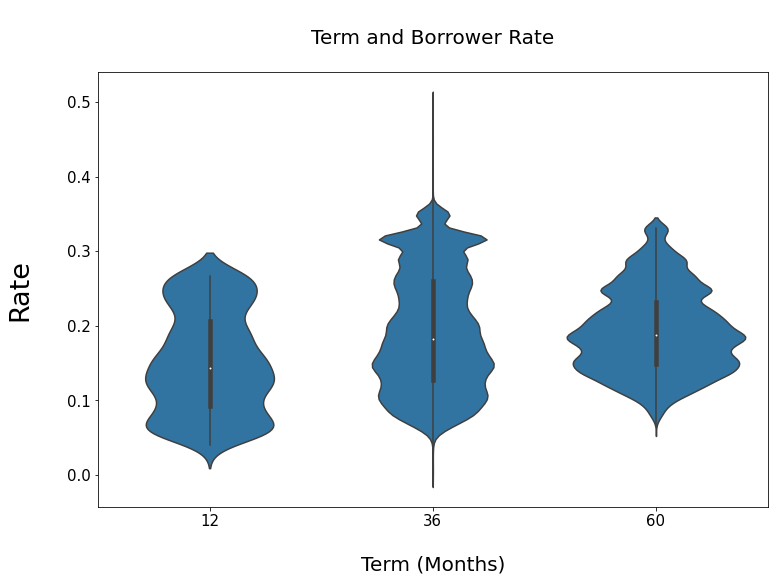

In [41]:
def Term_and_Borrower_Rate():
    
    # To convert "Term" to category, since there are only three types of terms (12, 36, 60),  no calculations are required.
    loans['Term'] = loans['Term'].astype('category') 
    
    # set up figure size and color
    plt.figure(figsize=[12, 8]) 
    base_color = sb.color_palette()[0]
    
    #plot data
    sb.violinplot(data=loans, x='Term', y='Borrower_Rate', color=base_color)
    
    #x-axis settings
    plt.xlabel('\nTerm (Months)', size = 20)
    plt.xticks(size = 15)
    
    #y-axis settings
    plt.ylabel('Rate\n', size = 27)
    plt.yticks(size=15)
    
    # Title of the chart
    plt.title('\nTerm and Borrower Rate\n', size = 20)

Term_and_Borrower_Rate()

It appears that the rate is not affected by the length of the term. The maximum rate for a 12-month term is 0.3 percent, whereas the 36-month term has a higher rate than the 12-month term. However, the maximum rate differs little between the 36- and 60-month terms. 

## <font color="blue">Visualization #12</font>

<a id='12'></a> 
**Loan Status & Total Prosper Loans**

Here, I want to see if loan status is associated with a high number of loans.

In [42]:
# In order to reduce the loan status classifications, I have grouped the statutes based on their general classifications.
# Payment issues will include all past-due, charged-off, and defaulted accounts.
#Furthermore, "FinalPaymentInProgress" is grouped with "current" because the loan is not yet paid off. 

status_total  = loans.replace({'Loan_Status' : {'Chargedoff':'Payment issues','Defaulted':'Payment issues',
                                                               'FinalPaymentInProgress':'Current', 
                                                               'Past Due (1-15 days)':'Payment issues',
                                                               'Past Due (31-60 days)':'Payment issues', 
                                                               'Past Due (61-90 days)':'Payment issues',
                                                               'Past Due (91-120 days)':'Payment issues',
                                                               'Past Due (16-30 days)':'Payment issues',
                                                               'Past Due (>120 days)':'Payment issues'}})

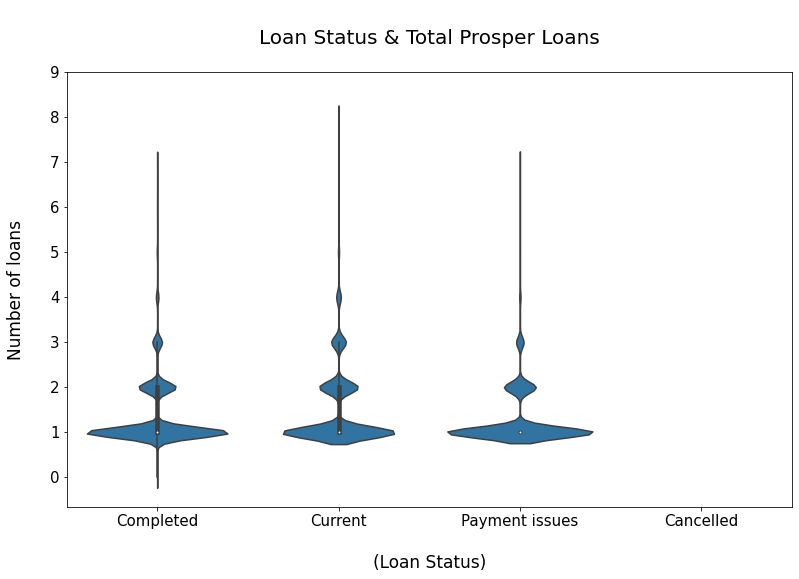

In [43]:
def status_total_plot(): 
    
    # set up figure size and color
    plt.figure(figsize=[13, 8]) 
    base_color = sb.color_palette()[0]
    
    #plot data
    sb.violinplot(data = status_total, x='Loan_Status', y='Total_Prosper_Loans', color=base_color)
    
    #x-axis settings
    plt.xlabel('\n(Loan Status)', size = 17)
    plt.xticks(size = 15)
    
    #y-axis settings
    plt.ylabel('Number of loans\n', size = 17)
    plt.yticks([0,1,2,3,4,5,6,7,8,9],size=15)
    
    # Title of the chart
    plt.title('\nLoan Status & Total Prosper Loans\n', size = 20)

status_total_plot()

From the violin plot above, it seems that the number of loans did not affect the statues of the loan. All loan statuses indicate that they have nearly the same number of loans (only one loan). However, there is one interesting observation here, which is that the number of individuals who have payment issues is higher than the number of current and completed loans.

## <font color="blue">Visualization #13</font>

<a id='13'></a> 
**Owning Home & Loan Reason**

Next, I will determine whether or not applicants who applied for loans for the purpose of home improvement actually own a home.

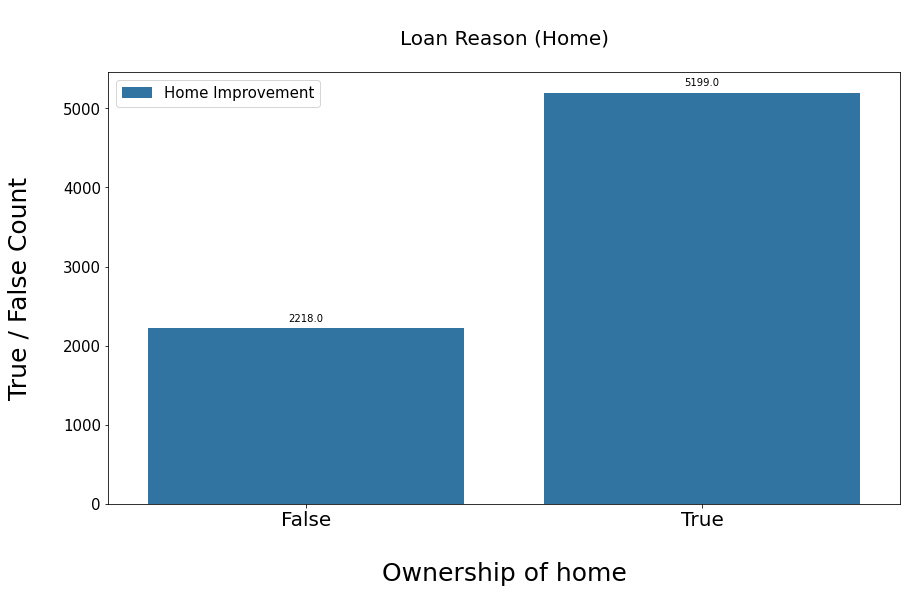

In [44]:
def LoanReason_OwnHome():
    
        # set up fig size and position
        plt.figure(figsize=[20, 15])
        plt.subplots_adjust(left=0.10, bottom=0.3, right=0.65, top=0.7, wspace=0.2, hspace=0.2)

        # I will choose only the "home improvement" reason as it is the reason of my investigation here.
        loanReason = loans.loc[(loans['Loan_Reason'] == 'Home Improvement')]

        #plotting the data
        reason_countplot = sb.countplot(data = loanReason, x = 'Owning_home', hue = 'Loan_Reason')

        # Add annotations to the plot using a for loop.
        for reason in reason_countplot.patches:
            reason_countplot.annotate(format(reason.get_height(),'.1f'), (reason.get_x() + reason.get_width() / 2,
                                   reason.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')
    
        # x-axis settings
        plt.xlabel('\nOwnership of home', size = 25)
        plt.xticks(size = 20)

        # y-axis settings
        plt.ylabel('True / False Count\n', size = 25)
        plt.yticks(size = 15)
        
        # Adding legend
        plt.legend(fontsize = 15, loc='upper left')

        # set up the title
        plt.title('\nLoan Reason (Home)\n', size = 20)

        # Dsiplay the plot
        plt.show();

LoanReason_OwnHome()

Applicants who applied for a loan to improve their homes actually owned homes. The number of people who applied for a loan to improve their homes is 5199. On the other hand, the number of people who do not own a home and have applied for loans regardless of owning a home is only 2218.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have found that the rate is not affected by the length of the term. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are a number of interesting relationships that I have discovered during my bivariate exploration. First, applicants who applied for home loans actually own homes, unlike the unemployed, who applied for loans for the same reason but do not own a home. Also, I explored the fact that the monthly payment of the loan is increasing as the loan amounts increase. This is an expected result since there is a fixed term that the loan needs to be paid into to avoid any payment issues. Finally, the employment status reveals an intriguing result: employed people are more likely to own their homes than retirees.

   ________

<a id='Multivariate_Exploration'></a>
# <font color="red">Multivariate Exploration</font>




In this section of the analysis, I will compare three variables at a time twice, using some visualisation Python libraries.
So, the relationship between the three varieties will be closely examined.

## <font color="blue">Visualization #14</font>   

<a id='14'></a> 
**Borrower Rate vs. Loan Original Amount & Employment Status Duration**

For this part, I want to find out what the relationship is between the loan amount and the rate. Also, I want to discover whether there is an effect employment duration on the rate of the loan.

In [45]:
loans = loans.reset_index(drop=True) 

In [46]:
# I have taken a random subset of 750 loans to reduce overplotting.
np.random.seed(113707)
sample = np.random.choice(loans.shape[0], 750, replace= False)
loans_sample =  loans.loc[sample]

In [47]:
# There are two outliers in the data sample above that could reduce the readability of the plots later on.
# So I have decided to clear them out to make clean plots.
loans_sample.loc[loans_sample['Loan_Original_Amount']> 27000];

In [48]:
# Get rid of the outliers 
over_27 = loans_sample[loans_sample['Loan_Original_Amount'] > 27000].index
loans_sample.drop(over_27 , inplace=True)

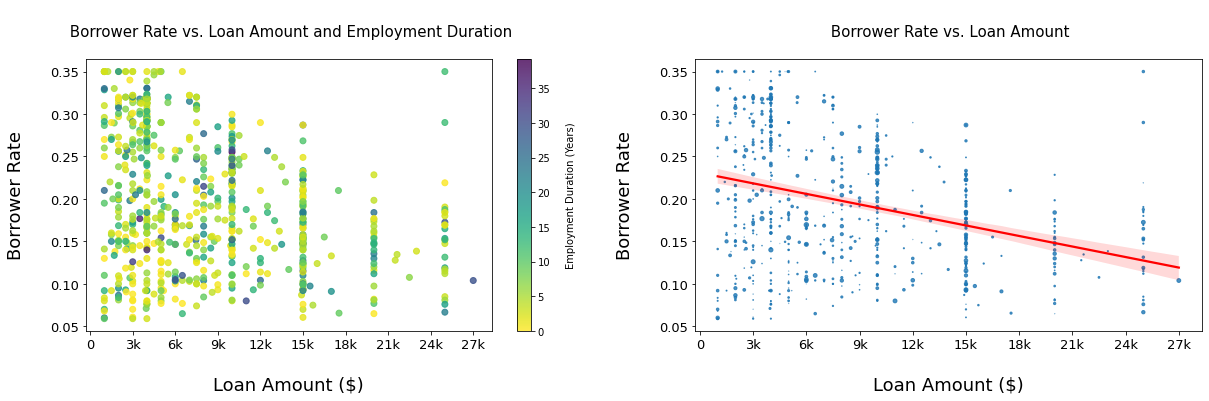

In [49]:
def rate_loan():
    
    # set up fig size
    plt.figure(figsize = [20, 5])

    # plot on left : Borrower Rate vs. Loan Amount and Employment Duration
    # ploting data
    plt.subplot(1, 2, 1)
    plt.scatter(data = loans_sample, x = 'Loan_Original_Amount', y = 'Borrower_Rate',c = 'Employment_Status_Duration', 
            cmap = 'viridis_r', alpha=0.80) 
                                
    # set up x-axis settings
    plt.xlabel('\nLoan Amount ($)', size = 18)
    plt.xticks([0,3e3,6e3,9e3, 1.2e4, 1.5e4, 1.8e4, 2.1e4, 2.4e4, 2.7e4],
           [0, '3k','6k', '9k', '12k', '15k', '18k', '21k', '24k', '27k'], size = 13)

    #set up y-axis setting
    plt.ylabel('Borrower Rate\n', size = 18)
    plt.yticks(size = 13)

    plt.title('\n Borrower Rate vs. Loan Amount and Employment Duration\n', size = 15)
    plt.colorbar(label = '\nEmployment Duration (Years)');

#ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

    # Plot on right: specifically to show the relationship between rate and loan amount (showing the regression)
    plt.subplot(1, 2, 2)
    sb.regplot(data = loans_sample, x = 'Loan_Original_Amount', y = 'Borrower_Rate', x_jitter=0.5, fit_reg=True,
           scatter_kws ={'s':loans_sample['Employment_Status_Duration']/2},line_kws={"color": "red"})

    # set up x-axis settings
    plt.xlabel('\nLoan Amount ($)', size = 18)
    plt.xticks([0,3e3,6e3,9e3, 1.2e4, 1.5e4, 1.8e4, 2.1e4, 2.4e4, 2.7e4],
           [0, '3k','6k', '9k', '12k', '15k', '18k', '21k', '24k', '27k'], size = 13)

    #set up y-axis setting
    plt.ylabel('Borrower Rate\n', size = 18)
    plt.yticks(size = 13)

    plt.title('\n Borrower Rate vs. Loan Amount\n', size = 15);

    plt.show()
    
rate_loan()

It has been found that the employment duration has not much affected the loan rate. However, there is a clear relationship between the loan amount and the loan rate. As the loan amount increases, the rate decreases. This is depicted on the left plot by the regression line, which has a negative slope. 

## <font color="blue">Visualization #15</font>

<a id='15'></a> 
**Loan Status vs. Employment Status & Loan Term**

* Finally, I would like to exploar the Distribution of Loan Status vs. Employment Status considering Loan Term

In [50]:
# Regrouping of the loan status for the sample dataset.
loans_sample = loans_sample.replace({'Loan_Status' : {'Chargedoff':'Payment issues','Defaulted':'Payment issues',
                                                               'FinalPaymentInProgress':'Current', 
                                                               'Past Due (1-15 days)':'Payment issues',
                                                               'Past Due (31-60 days)':'Payment issues', 
                                                               'Past Due (61-90 days)':'Payment issues',
                                                               'Past Due (91-120 days)':'Payment issues',
                                                               'Past Due (16-30 days)':'Payment issues',
                                                               'Past Due (>120 days)':'Payment issues'}})

In [51]:
def jitter_widget(jitter=0.1):
    
    #set up fig size and position
    plt.figure(figsize=[12, 15])
    plt.subplots_adjust(left=0.09, bottom=0.3, right=0.90, top=0.7, wspace=0.2, hspace=0.2)
    
    #Plot the data
    sb.stripplot(data = loans_sample, x='Employment_Status', y='Loan_Status', hue = 'Term',
            jitter = jitter, size=12, alpha = 0.5)
    
    #set up x-axis settings
    plt.xlabel('\nEmployment Status', size = 17)
    plt.xticks(size = 15)
    
    #set up x-axis settings
    plt.ylabel('Loan Status', size = 18)
    plt.yticks(size = 15)
    
    plt.title('Distribution of Loan Status vs. Employment Status considering Loan Term\n', size = 18)
#calling out the function
interactive(jitter_widget, jitter=(0, 0.65, 0.05))


interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

The most completed loans that had a 36-month term are paid by the employees. However, payment issues by the emplyees also had a notceble lans that are 36 moth payment plan. As shown in the plot above, the number of loans with a 60-month term is significantly lower than those with a 36-month term across all five job types. Unemployment and the retired have the fewest loans, as expected. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The employment duration has not much affected the loan rate

### Were there any interesting or surprising interactions between features?

- I explored that the rate of the loan is decreasing as the loan amounts increase. This surprised me a lot because I expected the opposite. Finally, the employment status reveals an intriguing result: employed people are more likely to own their homes than retirees.  

______________

<a id='Conclusions'></a>
# <font color="red">Conclusions</font>

- This analysis contained three different types of analysis, which are "Univariate Exploration", "Bivariate Exploration", and "Multivariate Exploration". 
 
 
- The main feature of interest was the `Borrwere Rate`. Borrower rate was visually explored and compared to other variables in the three types of visualisations. It has been found that the borrower rate distribution follows a normal distribution. Furthermore, the distribution is somewhat right-skewed. Nonetheless, the distribution features a lengthy peak near 0.32. Likewise, the rate is not affected by the length of the term.
 
 
- In addition, there are features that hold interesting properties about this analysis, which is the main feature of interest. For example, the rate of interest decreases as the loan amount increases. Also, the monthly payment of the loan increases as the loan amount increases, which is expected behaviour given the trend in this sector. 
 
 
- Fainally, The majority of completed loans with a length of 36 months are repaid by workers. However, payment concerns by employees were also accompanied by 36-month payment plans. As seen in the above graph, the number of loans with a 60-month duration is much smaller than that of loans with a 36-month period across all five occupational categories. Unemployment and the retired have the fewest loans, as predicted.

_____________________

<a id='Reference_List'></a>
# <font color="red">Reference List</font>


1-	https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value 

2-	https://www.statology.org/pandas-rename-columns/ 

3-	https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ 

4-	https://www.easytweaks.com/pandas-divide-column-value-another-sum/ 

5-	https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/ 

6-	https://www.youtube.com/watch?v=m0y5uqU--YQ 

7-	https://www.statology.org/seaborn-barplot-width/ 

8-	https://www.youtube.com/watch?v=8U5h3EJuu8M 

9-	https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/ 

10-	https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib 

11-	https://gist.github.com/MosaabMuhammed/2a700d5908d081aa09f0386cb905fc53 

12-	https://learn.udacity.com/nanodegrees/nd002-mcit/parts/cd0016/lessons/ls2235/concepts/4f098847-81dd-4301-8256-d472f8c99c07

13-	https://seaborn.pydata.org/generated/seaborn.barplot.html 

14-	https://www.statology.org/seaborn-title/ 

15-	https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart 

16-	https://www.statology.org/set-x-axis-values-matplotlib/ 

17-	https://github.com/mwaskom/seaborn/issues/1582 

18-	https://stackoverflow.com/questions/45616318/how-to-set-the-value-of-numpy-arange-from-the-given-data-in-scipy 	

19-	https://towardsdatascience.com/10-examples-that-will-make-you-use-pandas-query-function-more-often-a8fb3e9361cb 

20-	https://gist.github.com/MosaabMuhammed/2a700d5908d081aa09f0386cb905fc53

21-	https://www.statology.org/pandas-value_counts-percentage/ 

22-	https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f

23-	https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/ 

24-	https://www.youtube.com/watch?v=k7kt6Du1u24 

25-	https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html 

26-	https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot 

27-	https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/  

28-	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html 

29-	https://www.youtube.com/watch?v=zhUyC3tPVQQ 


 

